In [1]:
!pip install numpy matplotlib opencv-python


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
#collected from official opencv github
config_file=r"C:\Users\User\Downloads\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model=r"C:\Users\User\Desktop\debayan\.ipynb_checkpoints\frozen_inference_graph.pb"

In [5]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels = []  # empty list
file_name = r"C:\Users\User\Desktop\debayan\.ipynb_checkpoints\coco.txt"

with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)



< cv2.dnn.Model 000001B148350F90>

Read an Image

In [9]:
img=cv2.imread(r"C:\Users\User\Desktop\debayan\.ipynb_checkpoints\spiderman.webp")

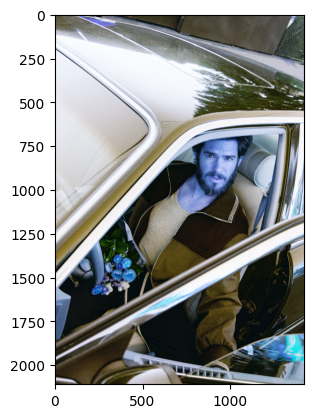

In [10]:
plt.imshow(img)#bgr

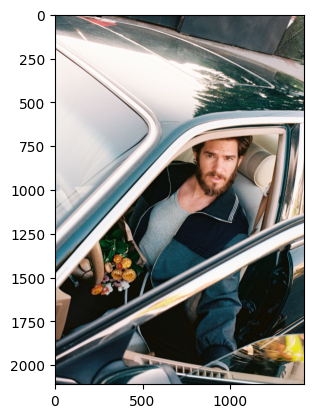

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #color image

In [12]:
ClassIndex, confidece ,bbox =model.detect(img,confThreshold=0.5)

In [13]:
print(ClassIndex)

[1]


In [14]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,0,255),thickness=3)

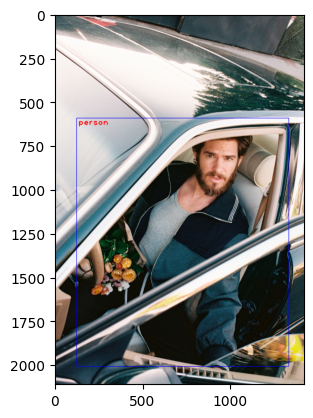

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #color image

In video object Detection

In [16]:
cap = cv2.VideoCapture(r"C:\Users\User\Desktop\debayan\.ipynb_checkpoints\992622-hd_1920_1080_25fps.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    #print(ClassIndex)

    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], 
                            (boxes[0]+10, boxes[1]+40),
                            font,
                            fontScale=font_scale,
                            color=(0, 0, 255),  # RED
                            thickness=3)

    cv2.imshow("Object Detection in Video", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

    